In [44]:
import pandas as pd

df = pd.read_csv("C:\\Text analysis\\internal project\\new_datasets\\features_distilbert_resnet18_pca300_labeled.csv", engine='python', on_bad_lines='skip')

display(df.head())
display(df.info())

,id,class_x,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,...,pca_292,pca_293,pca_294,pca_295,pca_296,pca_297,pca_298,pca_299,pca_300,class_y
0,7pg52c,0,16.725931,0.898004,3.001121,-2.021858,-0.333274,-3.012245,3.047638,0.629303,...,-0.330594,0.625159,-0.346938,-1.127260,-1.058295,-0.471838,-0.847992,-0.269395,-0.322460,0
1,3pg0g2,0,3.400613,2.904560,0.514988,-4.594906,4.216882,-0.090604,-5.560561,6.012910,...,-0.196570,-0.247635,0.242507,0.371159,-0.539482,0.406268,-0.134280,-0.016378,-0.327289,0
2,2oymfh,0,11.585366,-2.213581,3.649093,-3.565556,-4.340625,-1.052676,3.446301,-1.853482,...,0.141141,-0.032617,-0.139017,-1.251434,1.578626,-0.177264,-0.309952,0.360347,0.045609,0
3,b8f66f,0,7.499629,2.332999,-2.536501,-14.704941,2.727042,-0.292026,-4.280779,-0.976016,...,-0.448049,-0.502251,-0.072747,1.121781,-0.740508,0.129944,-0.781538,0.058738,-0.926772,0
4,9dk77r,0,7.896609,-6.573020,5.457674,-3.417090,-3.394320,-4.866018,-2.042858,-8.204024,...,-0.457690,-0.234148,-0.319668,-0.454304,0.409748,-0.632556,1.042888,-0.432400,0.250633,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 303 entries, id to class_y
dtypes: float64(300), int64(2), object(1)
memory usage: 69.4+ MB


None

In [45]:
from sklearn.model_selection import train_test_split

X = df.drop(['class_y', 'class_x', 'id'], axis=1)
y = df['class_y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (24000, 300)
Shape of X_test: (6000, 300)
Shape of y_train: (24000,)
Shape of y_test: (6000,)


In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

c:\Users\prath\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 256)            │        77,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,273 (462.00 KB)

 Trainable params: 118,273 (462.00 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9424 - loss: 0.1373 - val_accuracy: 0.9805 - val_loss: 0.0535
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9927 - loss: 0.0199 - val_accuracy: 0.9838 - val_loss: 0.0478
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9959 - loss: 0.0115 - val_accuracy: 0.9808 - val_loss: 0.0650
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9976 - loss: 0.0085 - val_accuracy: 0.9810 - val_loss: 0.0595
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9970 - loss: 0.0077 - val_accuracy: 0.9807 - val_loss: 0.0727
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9975 - loss: 0.0066 - val_accuracy: 0.9848 - val_loss: 0.0638
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9987 - loss: 0.0039 - val_accuracy: 0.9805 - val_loss: 0.0888
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9984 - loss: 0.0051 - val_accuracy: 0.

In [48]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Accuracy: {accuracy}")

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Precision: 0.9788235294117648
Recall: 0.986449864498645
F1-score: 0.9826218997806647
Accuracy: 0.9828333333333333


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import numpy as np
import os


In [64]:
def process_and_evaluate_dataset(file_path):
    """
    Loads a dataset, trains an MLP model, and evaluates its performance.

    Args:
        file_path (str): The path to the dataset CSV file.
    """
    print(f"Processing dataset: {file_path}")

    # Load the dataset
    df = pd.read_csv(file_path, engine='python', on_bad_lines='skip')

    # Separate features and labels
    X = df.drop(['class_y', 'class_x', 'id'], axis=1)
    y = df['class_y']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the MLP model
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)

    # Evaluate the model
    y_pred_prob = model.predict(X_test, verbose=0)
    y_pred = (y_pred_prob > 0.5).astype("int32")

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

     # Plot accuracy and loss
    plt.figure(figsize=(10, 4))

   
    results.append({
        "Dataset": file_path.split("\\")[-1],
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Accuracy": accuracy
    })

    # Print evaluation metrics
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print("-" * 30)

     # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(file_path.split("\\")[-1])
    plt.show()


    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Accuracy - {file_path.split("\\")[-1]}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Loss - {file_path.split("\\")[-1]}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


Processing dataset: C:\Text analysis\internal project\new_datasets\features_distilbert_resnet18_pca300_labeled.csv


c:\Users\prath\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Precision: 0.9824
Recall: 0.9834
F1-score: 0.9829
Accuracy: 0.9832
------------------------------


<Figure size 1000x400 with 0 Axes>

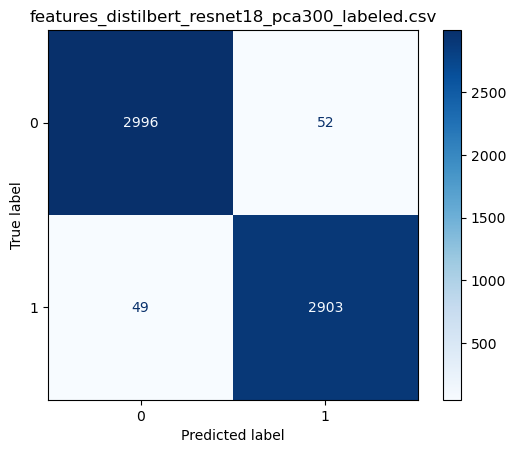

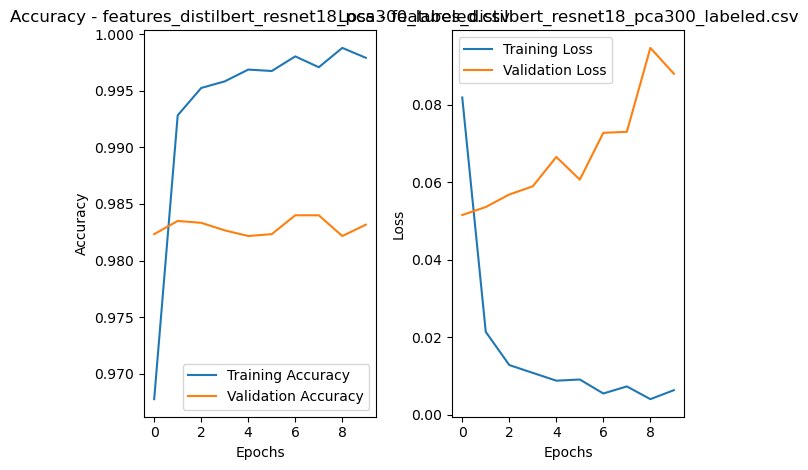

Processing dataset: C:\Text analysis\internal project\new_datasets\features_distilbert_resnet34_pca300_labeled.csv


c:\Users\prath\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Precision: 0.9756
Recall: 0.9905
F1-score: 0.9830
Accuracy: 0.9832
------------------------------


<Figure size 1000x400 with 0 Axes>

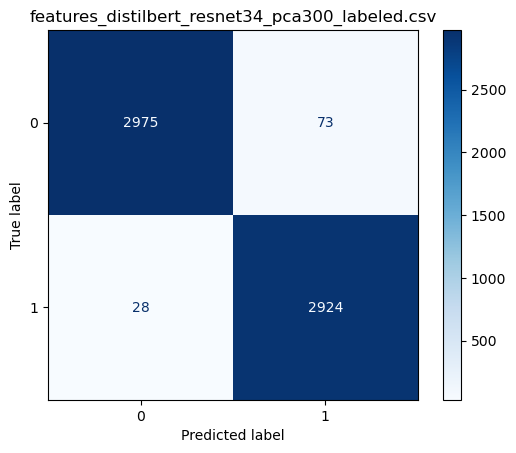

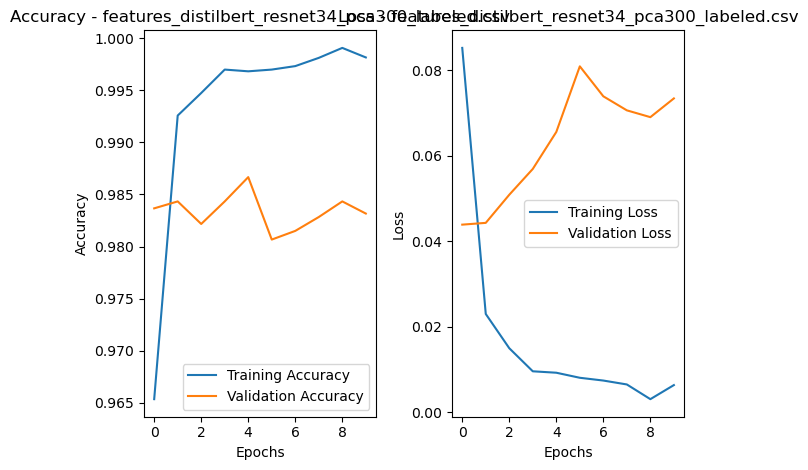

Processing dataset: C:\Text analysis\internal project\new_datasets\features_distilbert_resnet50_pca300_labeled.csv


c:\Users\prath\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Precision: 0.9797
Recall: 0.9807
F1-score: 0.9802
Accuracy: 0.9805
------------------------------


<Figure size 1000x400 with 0 Axes>

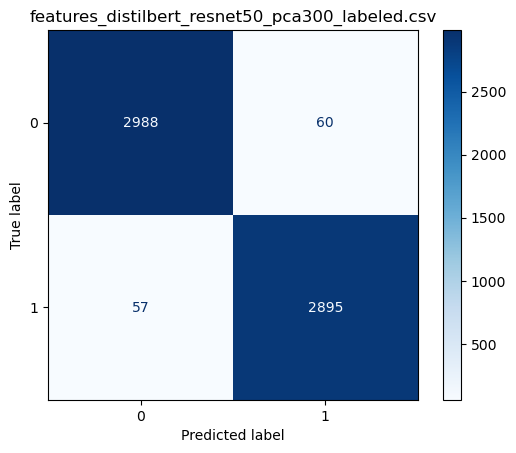

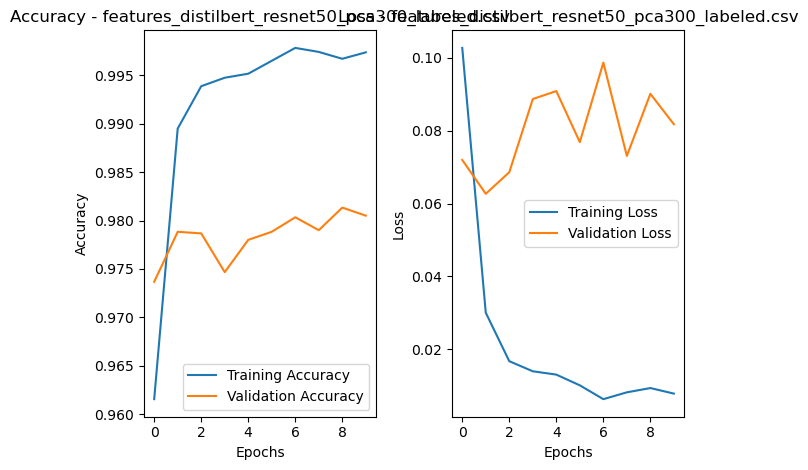

Processing dataset: C:\Text analysis\internal project\new_datasets\features_electra_resnet18_pca300_labeled.csv


c:\Users\prath\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Precision: 0.9976
Recall: 0.9980
F1-score: 0.9978
Accuracy: 0.9978
------------------------------


<Figure size 1000x400 with 0 Axes>

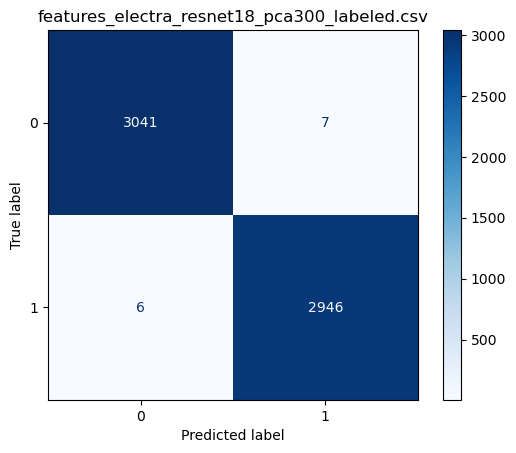

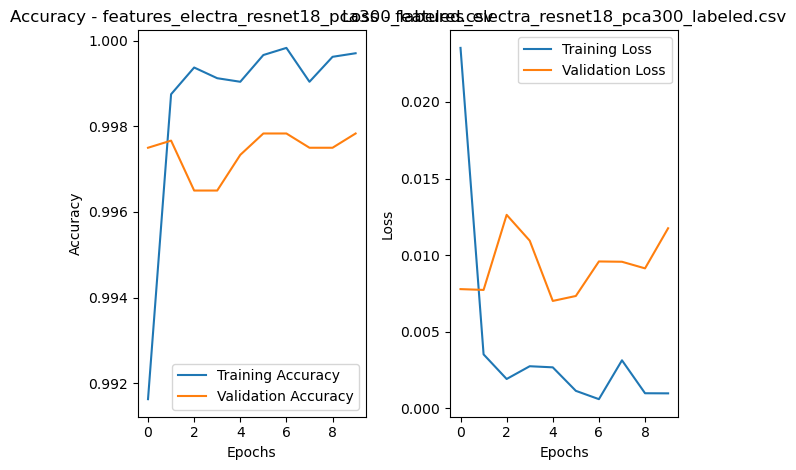

Processing dataset: C:\Text analysis\internal project\new_datasets\features_electra_resnet34_pca300_labeled.csv


c:\Users\prath\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Precision: 0.9990
Recall: 0.9959
F1-score: 0.9975
Accuracy: 0.9975
------------------------------


<Figure size 1000x400 with 0 Axes>

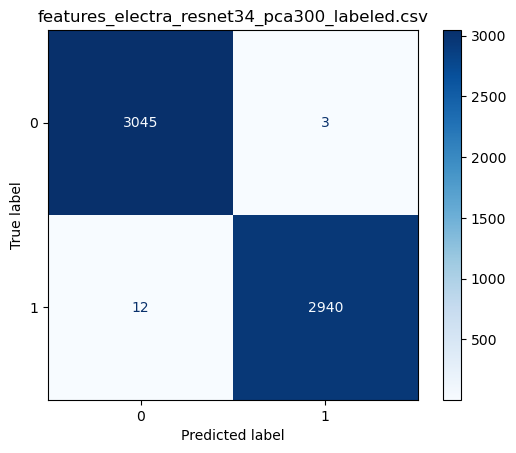

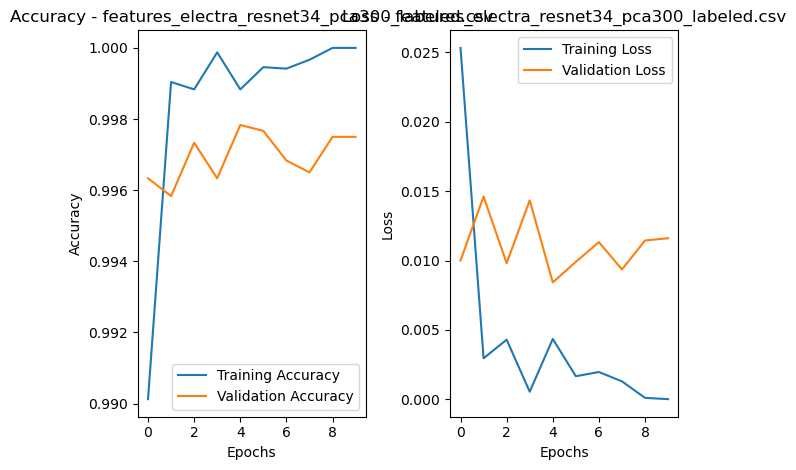

Processing dataset: C:\Text analysis\internal project\new_datasets\features_electra_resnet50_pca300_labeled.csv


c:\Users\prath\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Precision: 0.9980
Recall: 0.9949
F1-score: 0.9964
Accuracy: 0.9965
------------------------------


<Figure size 1000x400 with 0 Axes>

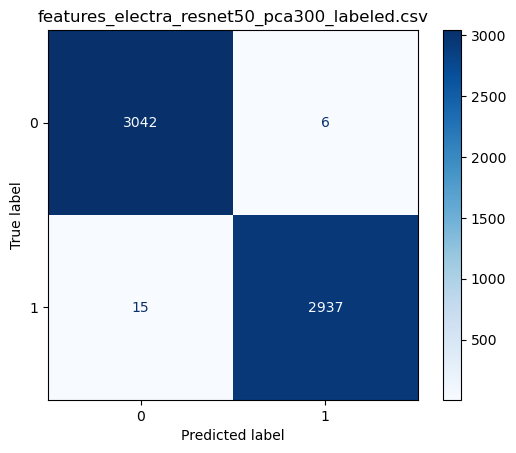

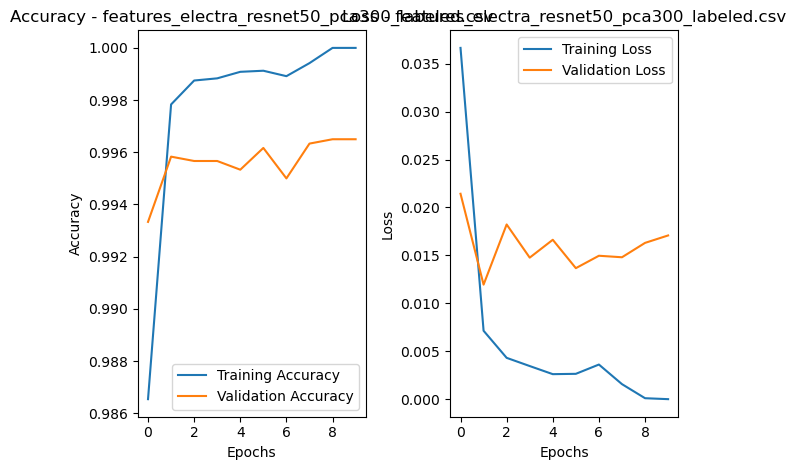

In [65]:
# List of dataset file paths
dataset_files = [
    "C:\\Text analysis\\internal project\\new_datasets\\features_distilbert_resnet18_pca300_labeled.csv",
    "C:\\Text analysis\\internal project\\new_datasets\\features_distilbert_resnet34_pca300_labeled.csv",
    "C:\\Text analysis\\internal project\\new_datasets\\features_distilbert_resnet50_pca300_labeled.csv",
    "C:\\Text analysis\\internal project\\new_datasets\\features_electra_resnet18_pca300_labeled.csv",
    "C:\\Text analysis\\internal project\\new_datasets\\features_electra_resnet34_pca300_labeled.csv",
    "C:\\Text analysis\\internal project\\new_datasets\\features_electra_resnet50_pca300_labeled.csv"


]
# Process each dataset
for file_path in dataset_files:
    process_and_evaluate_dataset(file_path)

In [67]:
results_df = pd.DataFrame(results)
csv_path = "C:\\Text analysis\\internal project\\mlp_results.csv"
results_df.to_csv(csv_path, index=False)

print("\n All results saved to:", csv_path)




 All results saved to: C:\Text analysis\internal project\mlp_results.csv
